In [1]:
import random

In [2]:
random.random()

0.4444279931310746

In [3]:
random.seed(0)

In [4]:
random.random()

0.8444218515250481

# Perform coin toss 100 times and count the number of heads

In [9]:
count = 0
random.seed(0)
for i in range(100):
    if random.random() < 0.5:
        count = count + 1

print(count)

37


# Perform this above experiment 100 times (tossing the coin 10,000 times!)

In [10]:
random.seed(0)
for e in range(100):
    count = 0
    for i in range(100):
        if random.random() < 0.5:
            count = count + 1
    print(count)

37
56
52
48
48
59
56
55
48
49
41
53
54
40
52
54
46
48
52
51
43
53
41
53
48
50
50
52
45
49
55
42
53
44
44
49
51
37
55
53
51
55
49
48
53
51
52
50
42
51
47
47
45
55
49
52
43
45
55
61
54
45
52
55
46
44
46
44
49
48
51
57
47
52
46
43
58
55
49
53
47
51
49
48
42
45
57
48
52
42
58
54
49
57
58
50
52
53
57
50


In [11]:
results = []
random.seed(0)
for e in range(100):
    count = 0
    for i in range(100):
        if random.random() < 0.5:
            count = count + 1
    results.append(count)

In [13]:
results

[37,
 56,
 52,
 48,
 48,
 59,
 56,
 55,
 48,
 49,
 41,
 53,
 54,
 40,
 52,
 54,
 46,
 48,
 52,
 51,
 43,
 53,
 41,
 53,
 48,
 50,
 50,
 52,
 45,
 49,
 55,
 42,
 53,
 44,
 44,
 49,
 51,
 37,
 55,
 53,
 51,
 55,
 49,
 48,
 53,
 51,
 52,
 50,
 42,
 51,
 47,
 47,
 45,
 55,
 49,
 52,
 43,
 45,
 55,
 61,
 54,
 45,
 52,
 55,
 46,
 44,
 46,
 44,
 49,
 48,
 51,
 57,
 47,
 52,
 46,
 43,
 58,
 55,
 49,
 53,
 47,
 51,
 49,
 48,
 42,
 45,
 57,
 48,
 52,
 42,
 58,
 54,
 49,
 57,
 58,
 50,
 52,
 53,
 57,
 50]

In [14]:
import pandas as pd
df = pd.DataFrame()
df["head"] = results

In [15]:
df

,head
0,37
1,56
2,52
3,48
4,48
...,...
95,50
96,52
97,53
98,57


<Axes: >

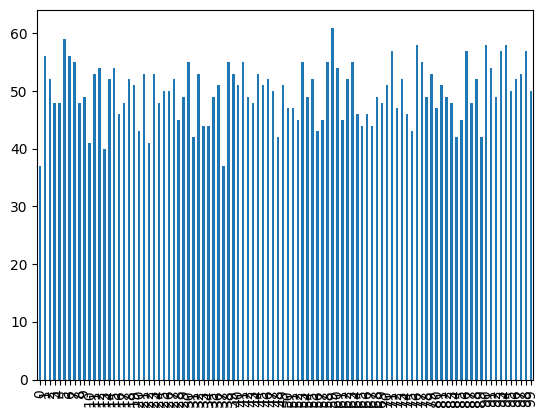

In [16]:
df["head"].plot.bar()

<Axes: ylabel='Frequency'>

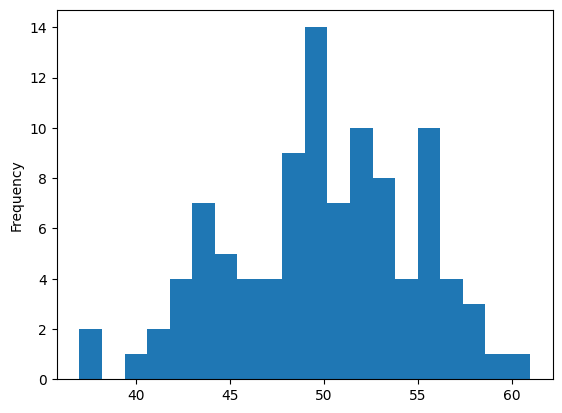

In [18]:
df["head"].plot.hist(bins=20)

In [23]:
results = []
random.seed(0)
for e in range(1000000):
    count = 0
    for i in range(100):
        if random.random() <= 0.5:
            count = count + 1
    results.append(count)

<Axes: ylabel='Frequency'>

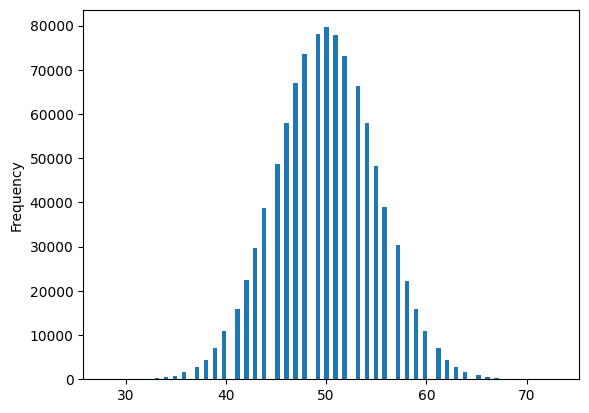

In [25]:
df = pd.DataFrame()
df["head"] = results
df["head"].plot.hist(bins=101)

In [26]:
df.describe()

,head
count,1000000.000000
mean,49.998927
std,5.000866
min,28.000000
25%,47.000000
50%,50.000000
75%,53.000000
max,73.000000


# Now use `scipy`

In [27]:
import numpy as np
from scipy.stats import binom

In [28]:
n, p = 100, 0.5
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')
mean, var, skew, kurt

(50.0, 25.0, 0.0, -0.02)

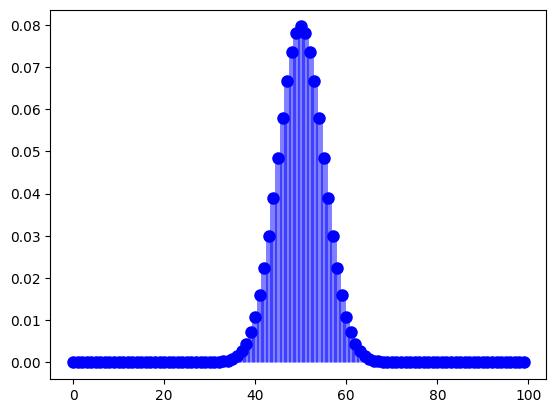

In [30]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
x = np.arange(0, 100)
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

# `pmf` and `cdf` of the binomial distribution

In [31]:
df = pd.DataFrame()
df["head"] = range(0, 101)

In [33]:
df["probability"] = binom.pmf(df["head"], 100, 0.5)

In [37]:
df["cumulative probability"] = binom.cdf(df["head"], 100, 0.5)

<Axes: xlabel='head'>

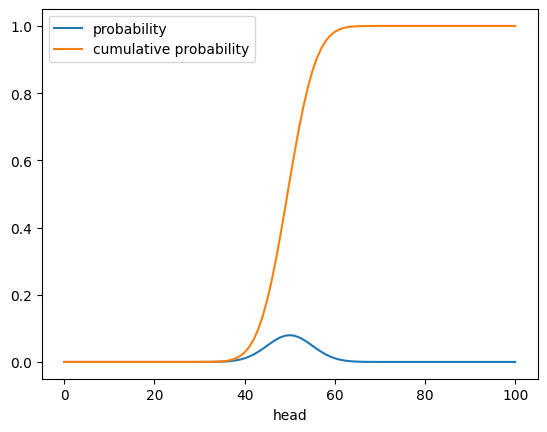

In [38]:
df.set_index("head").plot()

In [41]:
binom.ppf(0.995, 100, 0.5)

63.0

# Recovering 1.96 as correction factor for confidence interval 95%

In [42]:
from scipy.stats import norm

In [45]:
norm.ppf(0.025)

-1.9599639845400545

In [46]:
norm.ppf(0.975)

1.959963984540054